# Rain in Seattle!

## import all need Modules

In [1]:
# importing all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [372]:
import warnings
warnings.filterwarnings('ignore')

## import and show data sample

In [33]:
df = pd.read_csv('seattleWeather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


## Convert date strings into datetime objects

In [78]:
pd.to_datetime(df['DATE'])

,DATE,PRCP,TMAX,TMIN,RAIN
0,1949-08-01,0.00,92,62,False
1,1949-08-02,0.00,74,55,False
2,1949-08-03,0.00,71,55,False
3,1949-08-04,0.02,73,55,True
4,1949-08-05,0.00,74,53,False
...,...,...,...,...,...
207,1950-02-24,0.15,49,41,True
208,1950-02-25,0.80,58,41,True
209,1950-02-26,0.35,53,36,True
210,1950-02-27,0.00,46,31,False


## Pre-Processing the data

In [339]:
monthly_sums, prcp_sums = {}, {}
mt_dic, yt_dic = {}, {}
for y in range(1949, 2017):
    monthly_sums, mt_dic = {}, {}
    for m in range(1, 13):
        # Find monthly rain total
        m_total, t_ave = 0, 0
        t_ave = df[df['DATE']<str(y)+'-'+str(m+1).zfill(2)].merge(df[df['DATE']>str(y)+'-'+str(m).zfill(2)])['TMAX'].mean()
        m_total = df[df['DATE']<str(y)+'-'+str(m+1).zfill(2)].merge(df[df['DATE']>str(y)+'-'+str(m).zfill(2)])['PRCP'].sum()
        monthly_sums[m] = m_total
        mt_dic[m] = t_ave
    prcp_sums[y] = monthly_sums
    yt_dic[y] = mt_dic

# Create Dataframe for monthly data
rain=pd.DataFrame()
temps=pd.DataFrame()
for yr, mo in prcp_sums.items():
    rain[yr] = mo.values()
for yr, tave in yt_dic.items():
    temps[yr] = tave.values()


## processed data sample

In [303]:
temps.head()

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,37.258065,30.677419,42.161290,41.548387,48.967742,40.677419,43.645161,44.322581,37.870968,48.741935,...,43.580645,43.612903,43.677419,51.451613,46.225806,44.709677,43.000000,49.290323,50.290323,49.064516
1,44.071429,46.107143,46.750000,46.586207,46.035714,48.714286,44.321429,40.724138,45.607143,53.285714,...,48.714286,49.620690,48.500000,53.071429,45.035714,48.689655,49.035714,46.750000,54.535714,53.551724
2,53.225806,47.935484,46.387097,48.838710,50.096774,49.935484,46.064516,47.516129,50.322581,51.612903,...,53.483871,49.935484,48.000000,54.451613,51.387097,49.193548,54.870968,55.225806,57.870968,56.419355
3,59.400000,55.233333,61.066667,58.833333,54.933333,53.533333,52.833333,59.800000,57.833333,57.966667,...,58.700000,55.100000,57.700000,56.500000,52.233333,58.766667,57.633333,59.833333,59.900000,65.900000
4,68.419355,61.645161,64.612903,63.935484,61.709677,63.580645,58.935484,67.193548,66.645161,70.645161,...,66.387097,63.935484,65.870968,60.838710,59.741935,63.806452,67.322581,67.774194,68.032258,68.838710


In [304]:
rain.head()

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.77,8.91,6.80,4.89,12.92,8.36,3.35,8.67,2.41,8.72,...,6.22,4.26,5.40,6.17,4.99,6.83,4.16,3.70,3.66,7.45
1,5.89,5.74,8.76,2.46,3.70,4.38,4.30,2.17,5.57,5.36,...,3.38,1.47,1.51,3.52,3.05,3.63,1.58,6.11,5.27,5.97
2,3.54,8.40,3.76,3.52,3.72,2.07,3.25,4.95,6.26,2.26,...,4.42,3.65,4.16,3.76,6.29,7.20,2.74,9.44,4.47,5.52
3,1.18,2.92,0.65,2.03,2.10,2.64,3.64,0.33,2.23,3.51,...,0.69,1.90,3.36,3.49,4.47,2.68,5.89,4.18,2.03,1.19
4,1.30,0.78,1.61,0.99,2.51,1.89,1.95,0.83,1.17,0.94,...,1.46,0.89,3.61,2.83,3.20,2.05,2.38,3.15,0.58,0.94


## Create DataFrame with combined data

In [348]:
crossover = {}

for yr, mon in prcp_sums.items():
    for mo, data in mon.items():
        crossover[str(yr)+'-'+str(mo)] = [data, yt_dic[yr][mo]]

co=pd.DataFrame(index=crossover.keys())

for yr, mo in crossover.items():
    co[mo[0]] = mo[1]


In [359]:
co.sort_values(by='1949-1', axis=1, inplace=True)

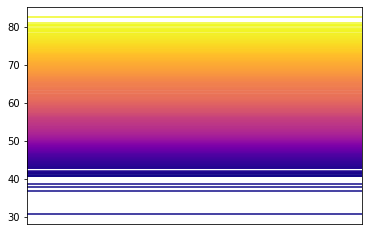

In [373]:
co.plot(colormap='plasma', legend=False)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

## In Conclusion
### The higher the temperature the lower the percipitation in Seattle

#### Source:
  * https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017